<a href="https://colab.research.google.com/github/jchoquev/DataPanda/blob/main/Corrupcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Corrupción para los ricos y los pobres en Perù:**
##¿Quién la soporta aún más?*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


HI -> Participación en el ingreso (nacional) que tiene el 10% más rico  
LI -> Participación en el ingreso (nacional) que tiene el 10% más pobre  
CPI -> Percepción de la corrupción  
GE -> Eficacia del gobierno  
GINI -> índice de Gini  
CC -> Control o lucha en contra de la corrupción


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/jchoquev/DataPanda/main/DataCorrupcion.csv",index_col="Tiempo",sep=";")
data

,CPI,HI,LI,GINI,GE,CC
Tiempo,,,,,,
2002,40,42.1,1.1,53.6,-0.341011,-0.273120
2003,37,42.2,1.3,53.1,-0.438426,-0.076417
2004,35,38.0,1.3,49.9,-0.512241,-0.321763
2005,35,38.5,1.2,50.4,-0.612720,-0.329965
2006,33,38.2,1.2,50.3,-0.669352,-0.200190
2007,35,37.8,1.2,50.0,-0.521256,-0.246271
2008,36,35.4,1.3,47.5,-0.356438,-0.186954
2009,37,35.2,1.4,47.0,-0.416684,-0.305230
2010,35,34.2,1.5,45.5,-0.191171,-0.228811


In [5]:
data=data.assign(LNCPI=np.log10(data.CPI))
data=data.assign(LNHI=np.log10(data.HI))
data=data.assign(LNLI=np.log10(data.LI))
data=data.assign(LNGINI=np.log10(data.GINI))
#data=data.assign(LNGE=(-1)*np.log10(-1*data.GE))

In [7]:
data[['LNHI','LNLI','LNCPI','LNGINI','GE','CC']]

,LNHI,LNLI,LNCPI,LNGINI,GE,CC
Tiempo,,,,,,
2002,1.624282,0.041393,1.602060,1.729165,-0.341011,-0.273120
2003,1.625312,0.113943,1.568202,1.725095,-0.438426,-0.076417
2004,1.579784,0.113943,1.544068,1.698101,-0.512241,-0.321763
2005,1.585461,0.079181,1.544068,1.702431,-0.612720,-0.329965
2006,1.582063,0.079181,1.518514,1.701568,-0.669352,-0.200190
2007,1.577492,0.079181,1.544068,1.698970,-0.521256,-0.246271
2008,1.549003,0.113943,1.556303,1.676694,-0.356438,-0.186954
2009,1.546543,0.146128,1.568202,1.672098,-0.416684,-0.305230
2010,1.534026,0.176091,1.544068,1.658011,-0.191171,-0.228811


In [8]:
datas = data[['LNCPI','GE','LNGINI','CC']]
datas.exog = sm.add_constant(datas)
res = sm.RLM(data[['LNLI']],datas.exog ).fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   LNLI   No. Observations:                   18
Model:                            RLM   Df Residuals:                       13
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 31 Aug 2021                                         
Time:                        22:27:38                                         
No. Iterations:                    31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9352      0.452      6.491      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:
datas = data[['LNCPI','GE','LNGINI','CC']]
datas.exog = sm.add_constant(datas)
res = sm.RLM(data[['LNHI']], datas.exog).fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   LNHI   No. Observations:                   18
Model:                            RLM   Df Residuals:                       13
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 31 Aug 2021                                         
Time:                        22:27:42                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6106      0.071     -8.627      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [3]:
cont=data.corr(method="spearman")
cont

,CPI,HI,LI,GINI,GE,CC
CPI,1.000000,-0.107439,0.133238,-0.101565,0.336434,-0.330086
HI,-0.107439,1.000000,-0.948360,0.995354,-0.756841,0.783686
LI,0.133238,-0.948360,1.000000,-0.964573,0.801723,-0.722386
GINI,-0.101565,0.995354,-0.964573,1.000000,-0.748194,0.783282
GE,0.336434,-0.756841,0.801723,-0.748194,1.000000,-0.488132
CC,-0.330086,0.783686,-0.722386,0.783282,-0.488132,1.000000


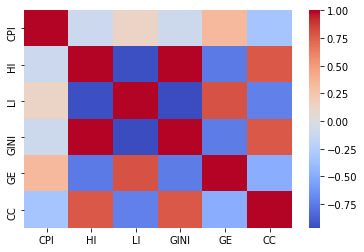

In [4]:
sns.heatmap(cont,
            xticklabels=cont.columns,
            yticklabels=cont.columns,
            cmap='coolwarm')

In [ ]:
plt.figure(figsize=(12,8))
lr=linear_model.LinearRegression()
lr.fit(data[['LNHI']],data[['LNCPI','GE','LNGINI','CC']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<Figure size 864x576 with 0 Axes>

In [ ]:
ransac=linear_model.RANSACRegressor()
lr.fit(data[['LNHI']],data[['LNCPI','GE','LNGINI','CC']])
#inliers_mask=ransac.
#outlier_mask=np.logical_not(inlier_mask)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
data[['LNHI']].min()

LNHI    1.49276
dtype: float64

In [ ]:
X=data[['LNHI']]
#line_x=np.arange(data[['LNHI']].min(),data[['LNHI']].max())[:,np.newaxis]
line_x=np.arange(X.min(),X.max())[:,np.newaxis] 

line_y=lr.predict(line_x)
line_y_ransac=ransac.predict(line_x)